In [2]:
import pandas as pd

file_path = "data/bangkok_traffy.csv"  # change this path if needed
df = pd.read_csv(file_path)

In [3]:
# Convert the 'type' column: e.g., "{ความสะอาด}" → ["ความสะอาด"]
df["type"] = df["type"].str.strip("{}").str.split(",")

In [4]:
df.head(1)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,[ความสะอาด],เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00


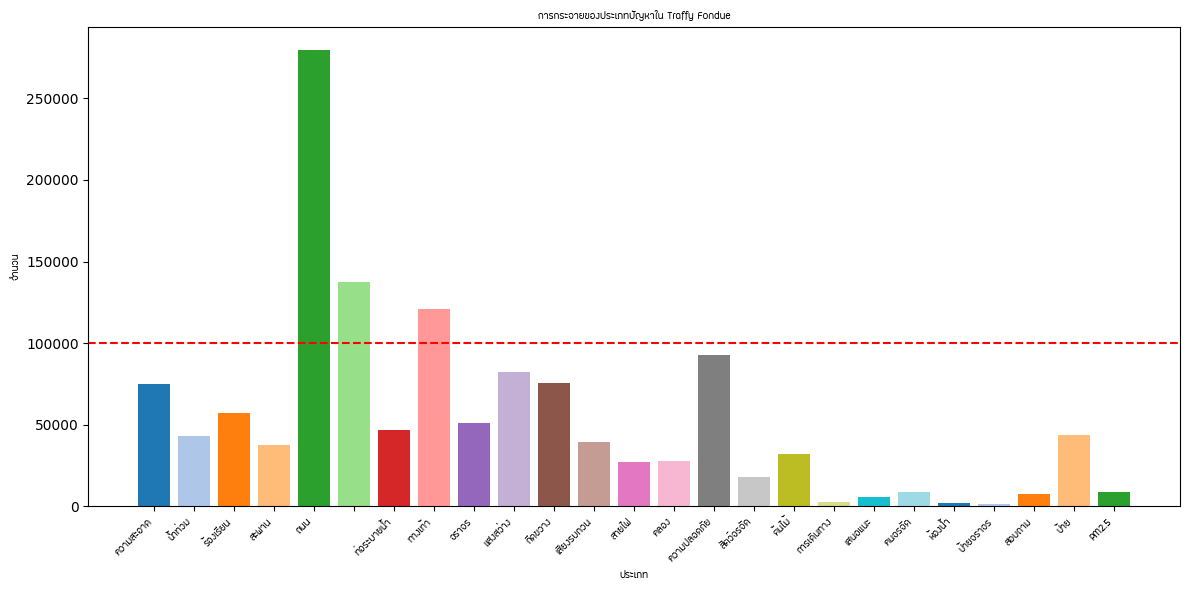

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager as fm

# Load custom Thai font
font_path = "fonts/FC Lamoon Regular ver 1.00.ttf"
thai_font = fm.FontProperties(fname=font_path)


df["type"] = df["type"].apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)

# Flatten and count types
all_types = [t for sublist in df["type"].dropna() for t in sublist]
type_counts = Counter(all_types)

# Get sorted keys and values
types = list(type_counts.keys())
counts = list(type_counts.values())

# Use a colormap (e.g., viridis, tab20, plasma)
cmap = plt.get_cmap("tab20")
colors = [cmap(i % cmap.N) for i in range(len(types))]

# Plot
plt.figure(figsize=(12, 6))
# วาดเส้นแนวนอนที่ y = 100000
plt.axhline(y=100000, color='red', linestyle='--', linewidth=1.5, label='เกณฑ์ 100,000')
plt.bar(types, counts, color=colors)
plt.xticks(rotation=45, ha='right', fontproperties=thai_font)
plt.xlabel("ประเภท", fontproperties=thai_font)
plt.ylabel("จำนวน", fontproperties=thai_font)
plt.title("การกระจายของประเภทปัญหาใน Traffy Fondue", fontproperties=thai_font)
plt.tight_layout()
plt.show()

### PyPDF2 (sucks)

In [ ]:
from PyPDF2 import PdfReader

# Path to the PDF file
pdf_path = "downloads/สำนักงานเขตคลองเตย.pdf"

# Load PDF
reader = PdfReader(pdf_path)

# Make sure it has enough pages
if len(reader.pages) >= 4:
    # Extract text from 3rd and 4th pages (index 2 and 3)
    page3_text = reader.pages[2].extract_text()
    page4_text = reader.pages[3].extract_text()

    # Combine and print
    combined = (page3_text or "") + "\n\n" + (page4_text or "")
    print(combined)
else:
    print("❌ PDF has fewer than 4 pages.")


394
(บาท)
เงินงบประมาณ เงินนอกงบประมาณ รวม
384,999,301        -                     384,999,301      
-                     -                     -                    
-                     -                     -                    
-                     -                     -                    
384,999,301        -                     384,999,301      
383,431,001      บาท
1,568,300          บาท
งบประมาณตามแผนยุทธศาสตร 1,568,300          บาท
งบประมาณตามแผนยุทธศาสตรบูรณาการ -                    บาท
(บาท)
เงินงบประมาณ เงินนอกงบประมาณ รวม
196,269,300        -                     196,269,300         
14,046,230         -                     14,046,230          
1,277,020           -                     1,277,020            
2,219,900           -                     2,219,900            
920,300             -                     920,300              
1,603,900           -                     1,603,900            
18,612,300         -                     18,612,300          
854,800   

### pdfplumber (slightly better)

In [ ]:
import pdfplumber

def read_pdf(path):
    with pdfplumber.open(path) as pdf:
        pages = [2, 3, 4]  # Page 3–5
        texts = [pdf.pages[i].extract_text() for i in pages if i < len(pdf.pages)]
    return "\n\n".join(texts)

print(readPdf("downloads/สำนักงานเขตคลองเตย.pdf"))


394
สํานักงานเขตคลองเตย
งบประมาณรายจายประจําปงบประมาณ พ.ศ. 2567 โดยสังเขป
ก) งบประมาณจําแนกตามประเภทงบประมาณ
(บาท)
ประเภทงบประมาณ เงินงบประมาณ เงินนอกงบประมาณ รวม
งบประมาณตามโครงสรางงาน 3 84,999,301 - 384,999,301
งบประมาณเพื่อสนับสนุนชวยเหลือ (Grant) - - -
งบประมาณเพื่อการชําระหนี้ - - -
งบประมาณเพื่อชดใชเงินยืมเงินสะสม - - -
รวมงบประมาณทั้งสิ้น 3 84,999,301 - 384,999,301
ข) งบประมาณตามโครงสรางงาน
งบประมาณภารกิจประจําพื้นฐาน 383,431,001 บาท
งบประมาณภารกิจตามแผนยุทธศาสตร 1,568,300 บาท
งบประมาณตามแผนยุทธศาสตร 1,568,300 บาท
งบประมาณตามแผนยุทธศาสตรบูรณาการ - บาท
(บาท)
งาน / โครงการ เงินงบประมาณ เงินนอกงบประมาณ รวม
การจัดบริการของสํานักงานเขต
งานรายจายบุคลากร 1 96,269,300 - 1 96,269,300
งานอํานวยการและบริหารสํานักงานเขต 14,046,230 - 14,046,230
งานปกครอง 1,277,020 - 1,277,020
งานบริหารทั่วไปและบริการทะเบียน 2,219,900 - 2,219,900
งานบริหารทั่วไปและบริหารการคลัง 920,300 - 920,300
งานบริหารทั่วไปและจัดเก็บรายได 1,603,900 - 1,603,900
งานบริหารทั่วไปฝายรักษาความสะอาด 18,612,300 - 18,6

In [ ]:
import os 

pdf_dir = "downloads"
pdf_data = {}

for fname in os.listdir(pdf_dir):
    if fname.endswith(".pdf"):
        path = os.path.join(pdf_dir, fname)
        pdf_data[fname] = read_pdf(path)

### now given the read text, we put that into llm to extract text
(looks overengineering, but it's convenient and free)

In [ ]:
import os
from dotenv import load_dotenv
import redis
import google.generativeai as genai

# Load from .env
load_dotenv()

# Set up Gemini
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

# Set up Redis
rdb = redis.Redis(
    host=os.getenv("REDIS_HOST", "localhost"),
    port=int(os.getenv("REDIS_PORT", 6379)),
    db=int(os.getenv("REDIS_DB", 0)),
    decode_responses=True
)

In [ ]:
from google.api_core import retry

model = genai.GenerativeModel("gemini-2.0-flash")

# Catch transient Gemini errors.
def is_retryable(e) -> bool:
    if retry.if_transient_error(e):
        # Good practice, but probably won't fire with the google-genai SDK
        return True
    elif (isinstance(e, genai.errors.ClientError) and e.code == 429):
        # Catch 429 quota exceeded errors
        return True
    elif (isinstance(e, genai.errors.ServerError) and e.code == 503):
        # Catch 503 model overloaded errors
        return True
    else:
        return False

@retry.Retry(predicate=is_retryable)
def generate_content_with_rate_limit(prompt):
  return model.generate_content(prompt)

In [ ]:


BUDGET_ITEMS = [
    "รวมงบประมาณทั้งสิ้น",
    "งานรายจ่ายบุคลากร",
    "งานอํานวยการและบริหารสํานักงานเขต",
    "งานปกครอง",
    "งานบริหารทั่วไปและบริการทะเบียน",
    "งานบริหารทั่วไปและบริหารการคลัง",
    "งานบริหารทั่วไปและจัดเก็บรายได้",
    "งานบริหารทั่วไปฝ่ายรักษาความสะอาด",
    "งานกวาดทําความสะอาดที่และทางสาธารณะ",
    "งานเก็บขยะมูลฝอยและขนถายสิ่งปฏิกูล",
    "งานดูแลสวนและพื้นที่สีเขียว",
    "งานบริหารทั่วไปและสอบสวนดําเนินคดี",
    "งานตรวจและบังคับใช้กฎหมาย",
    "งานบริหารทั่วไปฝ่ายโยธา",
    "งานอนุญาตก่อสร้าง ควบคุมอาคารและผังเมือง",
    "งานบํารุงรักษาซ่อมแซม",
    "งานระบายน้ําและแก้ไขปัญหาน้ำท่วม",
    "งานบริหารทั่วไปฝ่ายพัฒนาชุมชน",
    "งานพัฒนาชุมชนและบริการสังคม",
    "งานบริหารทั่วไปฝ่ายสิ่งแวดล้อมและสุขาภิบาล",
    "งานสุขาภิบาลอาหารและอนามัยสิ่งแวดล้อม",
    "งานป้องกันและควบคุมโรค",
    "งานบริหารทั่วไปฝ่ายการศึกษา",
    "งานงบประมาณโรงเรียน",
    "โครงการครอบครัวรักการอ่าน",
    "โครงการจ้างงานคนพิการเพื่อปฏิบัติงาน",
    "โครงการการจัดสวัสดิการ การสงเคราะห์ช่วยเหลือเด็ก สตรี ครอบครัว ผู้ด้อยโอกาส ผู้สูงอายุ และคนพิการ",
    "โครงการบูรณาการความร่วมมือในการพัฒนาประสิทธิภาพการแก้ไขปัญหาโรคไข้เลือดออกในพื้นที่กรุงเทพมหานคร"
]

def make_prompt(text):
    return f"""
ต่อไปนี้คือข้อความจากรายงานงบประมาณ:

{text[:12000]}

ให้คุณดึงรายการต่อไปนี้พร้อมตัวเลขงบประมาณ ถ้าระบุไว้: 
{', '.join(BUDGET_ITEMS)}

ข้อความอาจจะมีerror เช่น  ให้แก้ให้ถูกด้วย 
ห้ามให้มีอักษรแปลกๆโผล่มา
ถ้าไม่มี ใส่ 0
ห้ามใส่คำว่า บาท

ตอบกลับในรูปแบบ JSON แบบนี้เท่านั้น โดยแค่เปลี่ยน xxxxxxxx เป็นค่าจริง:
{{
  "รวมงบประมาณทั้งสิ้น": "xxxxxxxx",
  "งานรายจ่ายบุคลากร": "xxxxxxxx",
  "งานอำนวยการและบริหารสำนักงานเขต": "xxxxxxxx",
  "งานปกครอง": "xxxxxxxx",
  "งานบริหารทั่วไปและบริการทะเบียน": "xxxxxxxx",
  "งานบริหารทั่วไปและบริหารการคลัง": "xxxxxxxx",
  "งานบริหารทั่วไปและจัดเก็บรายได้": "xxxxxxxx",
  "งานบริหารทั่วไปฝ่ายรักษาความสะอาด": "xxxxxxxx",
  "งานกวาดทำความสะอาดที่และทางสาธารณะ": "xxxxxxxx",
  "งานเก็บขยะมูลฝอยและขนถ่ายสิ่งปฏิกูล": "xxxxxxxx",
  "งานดูแลสวนและพื้นที่สีเขียว": "xxxxxxxx",
  "งานบริหารทั่วไปและสอบสวนดำเนินคดี": "xxxxxxxx",
  "งานตรวจและบังคับใช้กฎหมาย": "xxxxxxxx",
  "งานบริหารทั่วไปฝ่ายโยธา": "xxxxxxxx",
  "งานอนุญาตก่อสร้าง ควบคุมอาคารและผังเมือง": "xxxxxxxx",
  "งานบำรุงรักษาซ่อมแซม": "xxxxxxxx",
  "งานระบายน้ําและแก้ไขปัญหาน้ำท่วม": "xxxxxxxx",
  "งานบริหารทั่วไปฝ่ายพัฒนาชุมชน": "xxxxxxxx",
  "งานพัฒนาชุมชนและบริการสังคม": "xxxxxxxx",
  "งานบริหารทั่วไปฝ่ายสิ่งแวดล้อมและสุขาภิบาล": "xxxxxxxx",
  "งานสุขาภิบาลอาหารและอนามัยสิ่งแวดล้อม": "xxxxxxxx",
  "งานป้องกันและควบคุมโรค": "xxxxxxxx",
  "งานบริหารทั่วไปฝ่ายการศึกษา": "xxxxxxxx",
  "งานงบประมาณโรงเรียน": "xxxxxxxx",
  "โครงการจ้างงานคนพิการเพื่อปฏิบัติงาน": "xxxxxxxx",
  "โครงการครอบครัวรักการอ่าน": "xxxxxxxx",
  "โครงการการจัดสวัสดิการ การสงเคราะห์ช่วยเหลือเด็ก สตรี ครอบครัว ผู้ด้อยโอกาส ผู้สูงอายุ และคนพิการ": "xxxxxxxx",
  "โครงการบูรณาการความร่วมมือในการพัฒนาประสิทธิภาพการแก้ไขปัญหาโรคไข้เลือดออกในพื้นที่กรุงเทพมหานคร": "xxxxxxxx"
}}
"""

def parse_budget_from_llm(text):
    prompt = make_prompt(text)
    res = generate_content_with_rate_limit(prompt)
    return res.text

In [ ]:
import json
import pandas as pd

results = []

for fname, text in pdf_data.items():
    print(f"📄 Processing: {fname}")
    try:
        llm_response = parse_budget_from_llm(text)
        print(llm_response)
        # Parse LLM output as JSON
        budget_json = json.loads(llm_response.replace('```json\n', '').replace('\n```', ''))

        # Add filename fallback if no 'เขต'
        if "เขต" not in budget_json:
            budget_json["เขต"] = fname.replace(".pdf", "")

        results.append(budget_json)

        # -- Redis commented out --
        # redis_key = f"budget:{budget_json.get('เขต', fname)}"
        # rdb.hset(redis_key, mapping=budget_json)
        # print(f"✅ Saved to Redis: {redis_key}")

    except Exception as e:
        print(f"❌ Error in {fname}: {e}")

# Convert to DataFrame and save to CSV
df = pd.DataFrame(results)
df.to_csv("data/extracted_budgets.csv", index=False)
print("📄 Saved to extracted_budgets.csv")


📄 Processing: สำนักงานเขตวัฒนา.pdf
```json
{
  "รวมงบประมาณทั้งสิ้น": "369693530",
  "งานรายจ่ายบุคลากร": "186276900",
  "งานอำนวยการและบริหารสำนักงานเขต": "17822550",
  "งานปกครอง": "125100",
  "งานบริหารทั่วไปและบริการทะเบียน": "1015000",
  "งานบริหารทั่วไปและบริหารการคลัง": "865000",
  "งานบริหารทั่วไปและจัดเก็บรายได้": "2132800",
  "งานบริหารทั่วไปฝ่ายรักษาความสะอาด": "17964100",
  "งานกวาดทำความสะอาดที่และทางสาธารณะ": "415700",
  "งานเก็บขยะมูลฝอยและขนถ่ายสิ่งปฏิกูล": "6387600",
  "งานดูแลสวนและพื้นที่สีเขียว": "2649200",
  "งานบริหารทั่วไปและสอบสวนดำเนินคดี": "5492000",
  "งานตรวจและบังคับใช้กฎหมาย": "123400",
  "งานบริหารทั่วไปฝ่ายโยธา": "1172000",
  "งานอนุญาตก่อสร้าง ควบคุมอาคารและผังเมือง": "48700",
  "งานบำรุงรักษาซ่อมแซม": "59374200",
  "งานระบายน้ําและแก้ไขปัญหาน้ำท่วม": "3116300",
  "งานบริหารทั่วไปฝ่ายพัฒนาชุมชน": "1151000",
  "งานพัฒนาชุมชนและบริการสังคม": "7958900",
  "งานบริหารทั่วไปฝ่ายสิ่งแวดล้อมและสุขาภิบาล": "186600",
  "งานสุขาภิบาลอาหารและอนามัยสิ่งแวดล้อม": "10

### clean again

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("data/extracted_budgets.csv")

# Move 'เขต' to first column if exists
if 'เขต' in df.columns:
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('เขต')))
    df = df[cols]

# Convert number strings to float (remove commas first)
for col in df.columns:
    if col != "เขต":
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "", regex=False)
            .str.strip()
            .replace("", None)
            .astype(float)
        )

# Save cleaned file
df.to_csv("data/cleaned_budgets.csv", index=False)
print("✅ Saved to: data/cleaned_budgets.csv")


✅ Saved to: data/cleaned_budgets.csv
